In [ ]:
!pip install tensorflow==1.15.2

In [ ]:
#https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-06-2-softmax_zoo_classifier.py
#https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-04-zoo.csv


# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


#Predicting animal type based on various features
xy = np.loadtxt('https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-04-zoo.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape one_hot:", Y_one_hot)

'''
one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)
'''

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=tf.stop_gradient([Y_one_hot])))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_data, Y: y_data})
                                        
        if step % 100 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.   

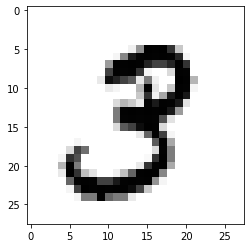

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
#이미지 학습 코드
#https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-07-4-mnist_introduction.py

# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # for reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

print("테스트 이미지 개수 : " , mnist.train.num_examples)

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for epoch in range(15):

        avg_cost = 0

        for i in range(int(mnist.train.num_examples / 100)):

            batch_xs, batch_ys = mnist.train.next_batch(100)
            sess.run(train , feed_dict={X:batch_xs , Y : batch_ys})

            tc = sess.run(cost , feed_dict={X:batch_xs , Y : batch_ys})
            avg_cost += tc / (mnist.train.num_examples / 100)

        print("%10d %10.7f" %(epoch,avg_cost))

    inputValue = int(input("화가인하고 싶은 이미지의 위치를 입력하세요"))
    


    print("다음 이미지는 무슨 숫자 입니까??")

    plt.imshow(
        mnist.test.images[inputValue].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()    

    print("정답은(one hot coed) : " , mnist.test.labels[inputValue])
    print("정답은 : " , sess.run(tf.argmax(mnist.test.labels[inputValue : inputValue+1], 1)))




    x_test = [
          mnist.test.images[inputValue]    
    ]

    result = sess.run(hypothesis , feed_dict={X:x_test})

    print("각 숫자의 확률 : " , result)
    print("예측 값 : " , sess.run(tf.argmax(result, 1)))



